# Curse of Dimensionality

This notebook visualizes the phenomenon of the curse of dimensionality.

Notice how the nearest and farthest distances become more and more similar as the dimensionality of the ambient space increases.

Lets look at the behavior of uniformly distributed random data.

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def styleset():
    matplotlib.rcParams['axes.linewidth']    = .75
    matplotlib.rcParams['xtick.major.width'] = .75
    matplotlib.rcParams['ytick.major.width'] = .75
    matplotlib.rcParams['xtick.major.size'] = 3
    matplotlib.rcParams['ytick.major.size'] = 3
    matplotlib.rcParams['xtick.minor.size'] = 2
    matplotlib.rcParams['ytick.minor.size'] = 2
    matplotlib.rcParams['font.size']       = 7
    matplotlib.rcParams['axes.titlesize']  = 7
    matplotlib.rcParams['axes.labelsize']  = 7
    matplotlib.rcParams['legend.fontsize'] = 7
    matplotlib.rcParams['xtick.labelsize'] = 7
    matplotlib.rcParams['ytick.labelsize'] = 7

styleset()

In [3]:
ratio = []
dists_list = []
dims_list = [10, 100, 1000, 10000, 100000]

for dims in dims_list:
    data = np.random.uniform(0, 1, size=(5000, dims))
    dists = pairwise_distances(data)
    ratio.append(dists[dists!=0].min() / dists.max())
    dists_list.append(dists)

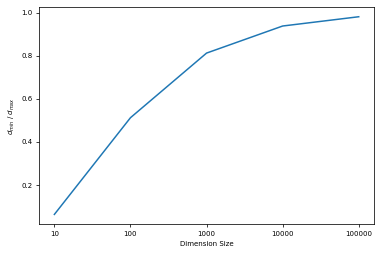

In [4]:
fig, ax = plt.subplots()
_ = ax.plot(ratio)
_ = ax.set_xlabel("Dimension Size")
_ = ax.set_ylabel("$d_{min}$ / $d_{max}$")
_ = ax.set_xticks([0, 1, 2, 3, 4])
_ = ax.set_xticklabels(["10", "100", "1000", "10000", "100000"])

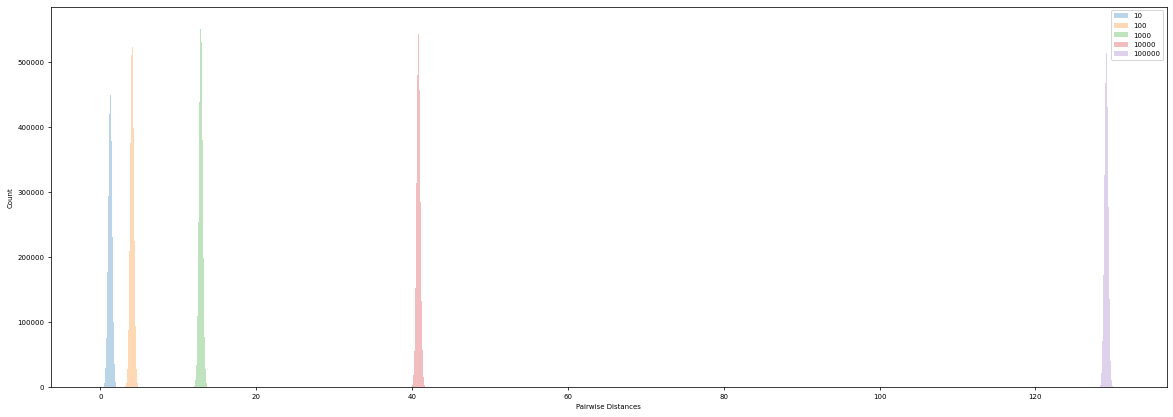

In [5]:
fig, ax = plt.subplots(figsize=(20, 7))

for i, d in enumerate(dists_list):
    dists_flattened = np.triu(d).flatten()
    dists_flattened = dists_flattened[dists_flattened != 0]
    _ = ax.hist(dists_flattened, bins=100, alpha=0.3, label=dims_list[i])
_ = ax.legend()
_ = ax.set_xlabel('Pairwise Distances')
_ = ax.set_ylabel('Count')

## Lets see if this happens with real data

We will load the MNIST data and then compare the distributions of distances of MNIST to a random Uniform with the same dimension.

Notice how the real life MNIST data does not behave like the uniform data:
* $d_{min}$ / $d_{max}$ is much smaller
* the distances in general have much more variance
* There are much more datapoints nearby in ambient space in MNIST vs. the Uniform dataset

These imply that the MNIST dataset must have an *intrinsic* dimension smaller then than what it appears to be!

In [12]:
mnist_data, mnist_labels = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, data_home='data')
mnist_data /= mnist_data.max()  # divide by 255 to get in [0,1]

In [17]:
data = np.random.uniform(0, 1, size=(5000, mnist_data.shape[1]))

In [29]:
ratio = []
dists_list = []

# distances for mnist data
subsample = np.random.choice(mnist_data.shape[0], size=(5000), replace=False) # take subset for computational efficiency
dists = pairwise_distances(mnist_data[subsample])
ratio.append(dists[dists!=0].min() / dists.max())
dists_list.append(dists)

# distances for uniform baseline
dists = pairwise_distances(data)
ratio.append(dists[dists!=0].min() / dists.max())
dists_list.append(dists)

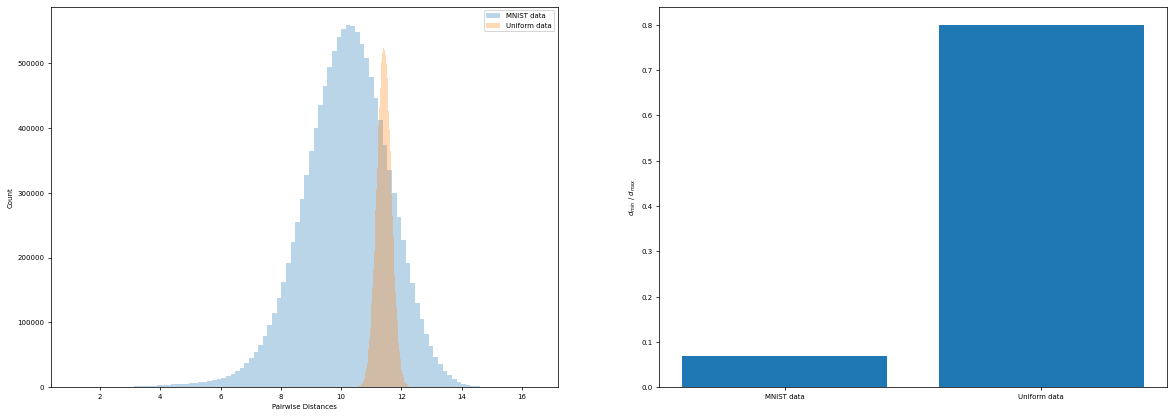

In [38]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 7))
lab_list = ['MNIST data', 'Uniform data']

for i, d in enumerate(dists_list):
    dists_flattened = np.triu(d).flatten()
    dists_flattened = dists_flattened[dists_flattened != 0]
    _ = ax[0].hist(dists_flattened, bins=100, alpha=0.3, label=lab_list[i])
_ = ax[0].legend()
_ = ax[0].set_xlabel('Pairwise Distances')
_ = ax[0].set_ylabel('Count')

_ = ax[1].bar(x=lab_list, height=ratio)
_ = ax[1].set_ylabel("$d_{min}$ / $d_{max}$")